# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [4]:
data=pd.read_csv("/kaggle/input/amazon-product-reviwes/amazon.csv")

/tmp/ipykernel_35/1837150118.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/kaggle/input/amazon-product-reviwes/amazon.csv")


In [5]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
# 3. Filter & Label Sentiment
data = data[data['reviews.rating'] != 3.0]  # Remove neutral reviews
data['Sentiment'] = data['reviews.rating'].apply(lambda x: 1 if x > 3 else 0)


In [7]:
data.dropna(subset=['reviews.text'], inplace=True)


In [8]:
data.reset_index(drop=True, inplace=True)


In [9]:
data["reviews.rating"].value_counts()

reviews.rating
5.0    23774
4.0     8541
1.0      410
2.0      402
Name: count, dtype: int64

<Axes: xlabel='reviews.rating', ylabel='count'>

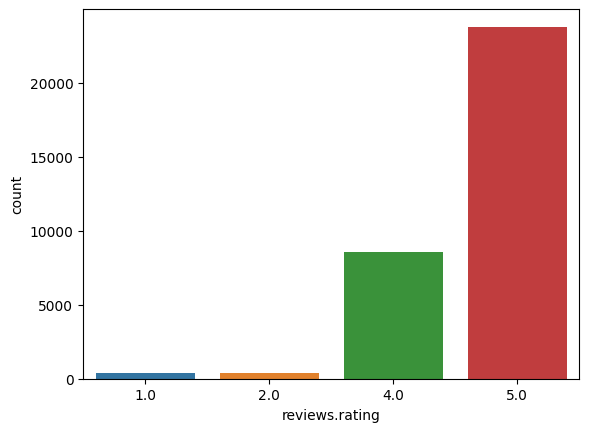

In [10]:
sns.countplot(x=data["reviews.rating"])

# Pre-processing Data(NLTK Data Cleaning)

In [11]:
from nltk.corpus import stopwords

In [12]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [13]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [14]:
courps=[]

for i in range(len(data)):
   s=re.sub('[^a-zA-Z]'," ",data["reviews.text"][i])
   s=s.lower()
   s=s.split()
   s=[word for word in s if word not in stopwords.words('english')]
   s=' '.join(s)
   s=ps.stem(s)
   courps.append(s)


In [15]:
print(courps[5])

amazon fire inch tablet perfect size purchased husband bigger screen phone gotten one years ago knew would good purchas


In [16]:
data["reviews.text"]=courps

# Convert text to numerical format

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [18]:
x=cv.fit_transform(courps).toarray()

In [19]:
cv.fit_transform(courps).toarray().shape

(33160, 13630)

In [20]:
data['Sentiment'].value_counts()

Sentiment
1    32315
0      845
Name: count, dtype: int64

In [21]:
data.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'Sentiment'],
      dtype='object')

# Visualize the most frequent Words

In [22]:
positive_reviews = data[data['Sentiment'] == 1]["reviews.text"]
negative_reviews = data[data['Sentiment'] == 0]["reviews.text"]


In [24]:
from collections import Counter

def get_word_freq(text_series):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(10)


In [25]:
pos_common = get_word_freq(positive_reviews)
neg_common = get_word_freq(negative_reviews)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


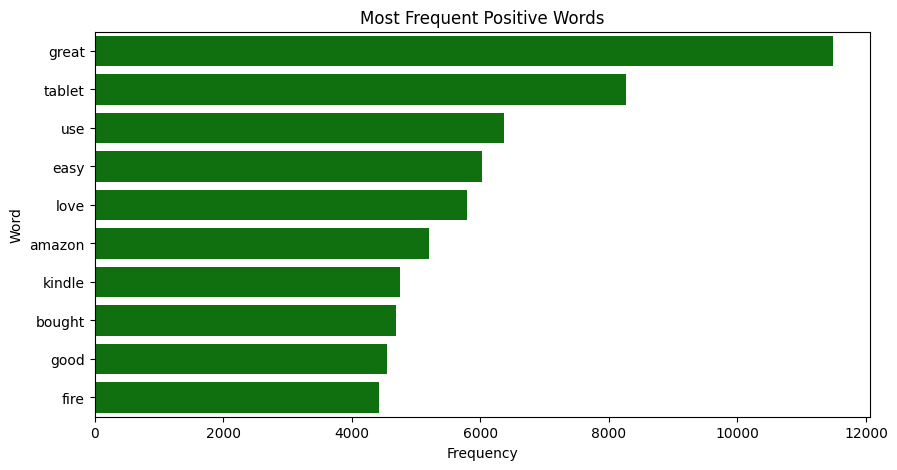

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


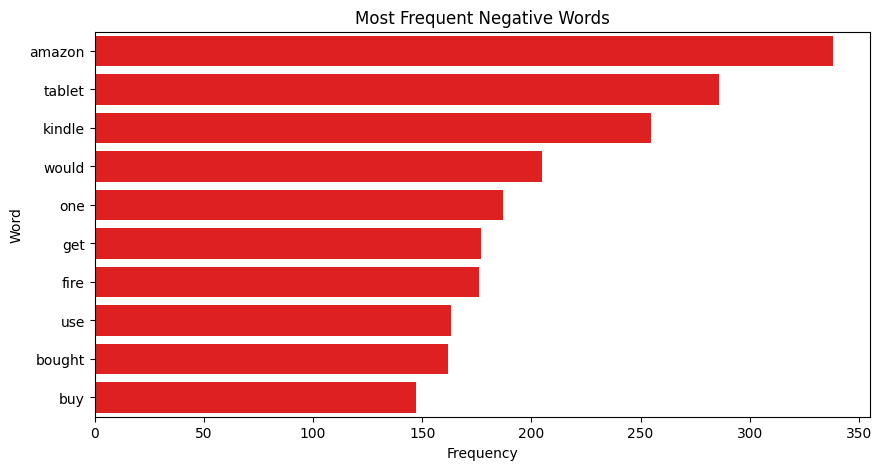

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_freq(word_freq, title, color):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), color=color)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.show()

plot_word_freq(pos_common, "Most Frequent Positive Words", "green")
plot_word_freq(neg_common, "Most Frequent Negative Words", "red")


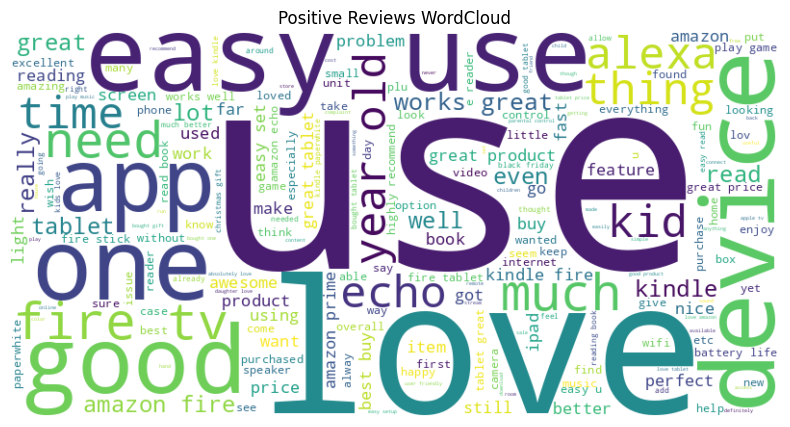

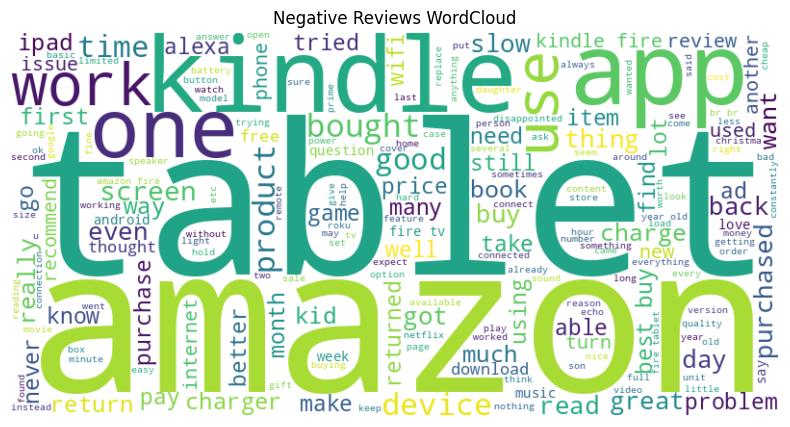

In [27]:
from wordcloud import WordCloud
def show_wordcloud(series, title):
    text = ' '.join(series)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

show_wordcloud(positive_reviews, "Positive Reviews WordCloud")
show_wordcloud(negative_reviews, "Negative Reviews WordCloud")


 # Modeling Training /Building

In [28]:
y=data['Sentiment']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33 ,random_state=42)

In [31]:
x_train.shape

(22217, 13630)

In [32]:
x_test.shape

(10943, 13630)

# Train a binary classifier (Logistic Regression)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

# Predict on test set

In [34]:
y_pred1=model.predict(x_test)

# Evaluate performance

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.9766974321484053

Confusion Matrix:
 [[   76   208]
 [   47 10612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.27      0.37       284
           1       0.98      1.00      0.99     10659

    accuracy                           0.98     10943
   macro avg       0.80      0.63      0.68     10943
weighted avg       0.97      0.98      0.97     10943



# Train with Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
clf=MultinomialNB()

In [38]:
clf.fit(x_train,y_train)

MultinomialNB()

# Model Prediction


In [39]:
y_pred2= clf.predict(x_test)

In [40]:
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

# Model evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


Accuracy: 0.9738645709586037

Confusion Matrix:
 [[   45   239]
 [   47 10612]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.16      0.24       284
           1       0.98      1.00      0.99     10659

    accuracy                           0.97     10943
   macro avg       0.73      0.58      0.61     10943
weighted avg       0.97      0.97      0.97     10943

